In [1]:
import pandas as pd
df = pd.read_csv("NSE-Tata_Global_Beverages_Limited.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [2]:
df.duplicated().sum()

np.int64(0)

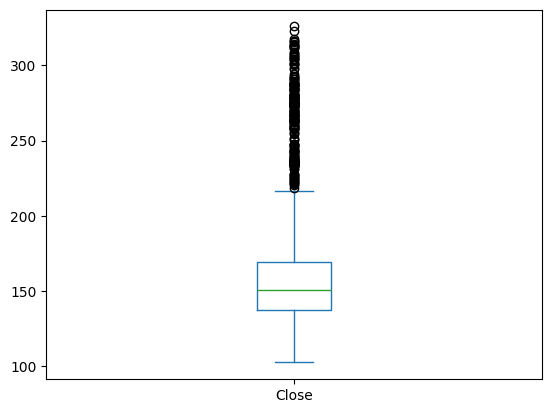

In [4]:
import matplotlib.pyplot as plt
df['Close'].plot(kind='box')
plt.show()

In [5]:
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Close'] < Q1 - 1.5*IQR) | (df['Close'] > Q3 + 1.5*IQR)]
print(outliers)


           Date    Open    High     Low    Last   Close  Total Trade Quantity  \
2    2018-10-04  223.50  227.80  216.15  217.25  218.20             1728786.0   
3    2018-10-03  230.00  237.50  225.75  226.45  227.60             1708590.0   
4    2018-10-01  234.55  234.60  221.05  230.30  230.90             1534749.0   
5    2018-09-28  234.05  235.95  230.20  233.50  233.75             3069914.0   
6    2018-09-27  234.55  236.80  231.10  233.80  233.25             5082859.0   
..          ...     ...     ...     ...     ...     ...                   ...   
230  2017-11-02  227.90  231.25  223.40  226.95  226.35             7866167.0   
231  2017-11-01  226.95  231.40  226.35  228.00  227.80             3608627.0   
232  2017-10-31  226.95  228.25  223.15  227.50  226.95             5175219.0   
233  2017-10-30  225.00  230.25  222.50  226.50  226.80            13953152.0   
234  2017-10-27  211.30  221.80  209.75  221.70  220.50             8891566.0   

     Turnover (Lacs)  
2   

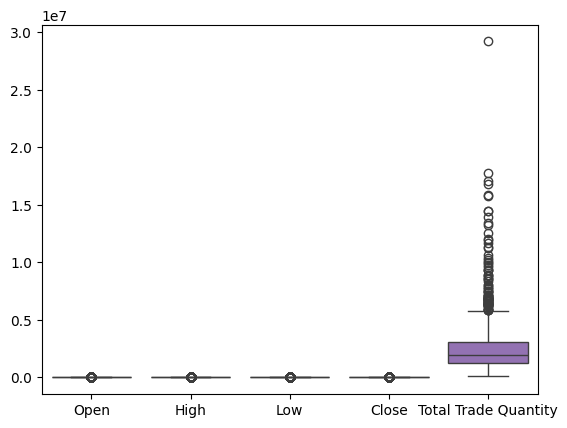

In [7]:
import seaborn as sns

sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Total Trade Quantity']])
plt.show()

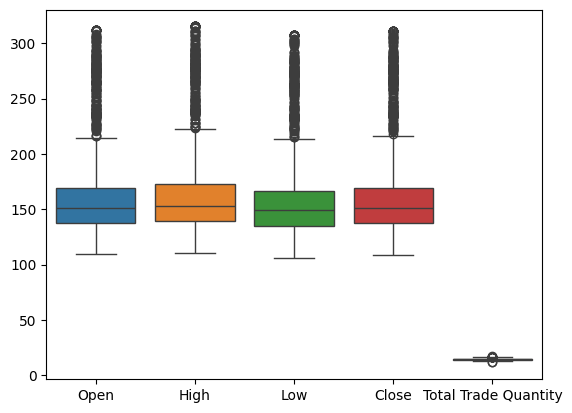

In [8]:
import pandas as pd
import numpy as np

# Columns to cap (prices)
price_cols = ['Open', 'High', 'Low', 'Close']

# Cap at 1st and 99th percentile
for col in price_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

# Log transform Total Trade Quantity
df['Total Trade Quantity'] = np.log1p(df['Total Trade Quantity'])

# Optional: check boxplot after handling
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Total Trade Quantity']])
plt.show()
